Download the necessary images from google and use the Haar cascade algorithms to perform detection of any of the following objects.
<br>-Eye
<br>-Face
<br>-Smile
<br>-Eye Glasses
<br>-Number plate

Note: The number Plate and eyeglasses algorithm are not working despite trying for multiple objects

In [108]:
import numpy as np
import cv2 # Computer Vision 2
from google.colab.patches import cv2_imshow

# Face detection Haar Cascade

In [109]:
!wget https://www.westend61.de/images/0000125390pw/large-group-of-business-people-standing-against-white-background-WESTF016979.jpg -O group.jpg

--2023-08-01 17:00:50--  https://www.westend61.de/images/0000125390pw/large-group-of-business-people-standing-against-white-background-WESTF016979.jpg
Resolving www.westend61.de (www.westend61.de)... 94.130.134.142, 2a01:4f8:13b:356f::2
Connecting to www.westend61.de (www.westend61.de)|94.130.134.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104625 (102K) [image/jpeg]
Saving to: ‘group.jpg’

group.jpg           100%[===================>] 102.17K  --.-KB/s    in 0.1s    

2023-08-01 17:00:51 (716 KB/s) - ‘group.jpg’ saved [104625/104625]



In [110]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2023-08-01 17:00:51--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2023-08-01 17:00:51 (18.6 MB/s) - ‘haarcascade_frontalface_default.xml.1’ saved [930127/930127]



In [111]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml

--2023-08-01 17:00:51--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘haarcascade_eye.xml.1’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s    in 0.03s   

2023-08-01 17:00:52 (9.84 MB/s) - ‘haarcascade_eye.xml.1’ saved [341406/341406]



In [112]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml

--2023-08-01 17:00:52--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188506 (184K) [text/plain]
Saving to: ‘haarcascade_smile.xml.1’

haarcascade_smile.x 100%[===================>] 184.09K  --.-KB/s    in 0.02s   

2023-08-01 17:00:52 (7.40 MB/s) - ‘haarcascade_smile.xml.1’ saved [188506/188506]



In [113]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye_tree_eyeglasses.xml

--2023-08-01 17:00:52--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye_tree_eyeglasses.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 601661 (588K) [text/plain]
Saving to: ‘haarcascade_eye_tree_eyeglasses.xml.1’

haarcascade_eye_tre 100%[===================>] 587.56K  --.-KB/s    in 0.04s   

2023-08-01 17:00:52 (13.3 MB/s) - ‘haarcascade_eye_tree_eyeglasses.xml.1’ saved [601661/601661]



In [114]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_license_plate_rus_16stages.xml

--2023-08-01 17:00:52--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_license_plate_rus_16stages.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47775 (47K) [text/plain]
Saving to: ‘haarcascade_license_plate_rus_16stages.xml.1’

haarcascade_license 100%[===================>]  46.66K  --.-KB/s    in 0.01s   

2023-08-01 17:00:52 (4.47 MB/s) - ‘haarcascade_license_plate_rus_16stages.xml.1’ saved [47775/47775]



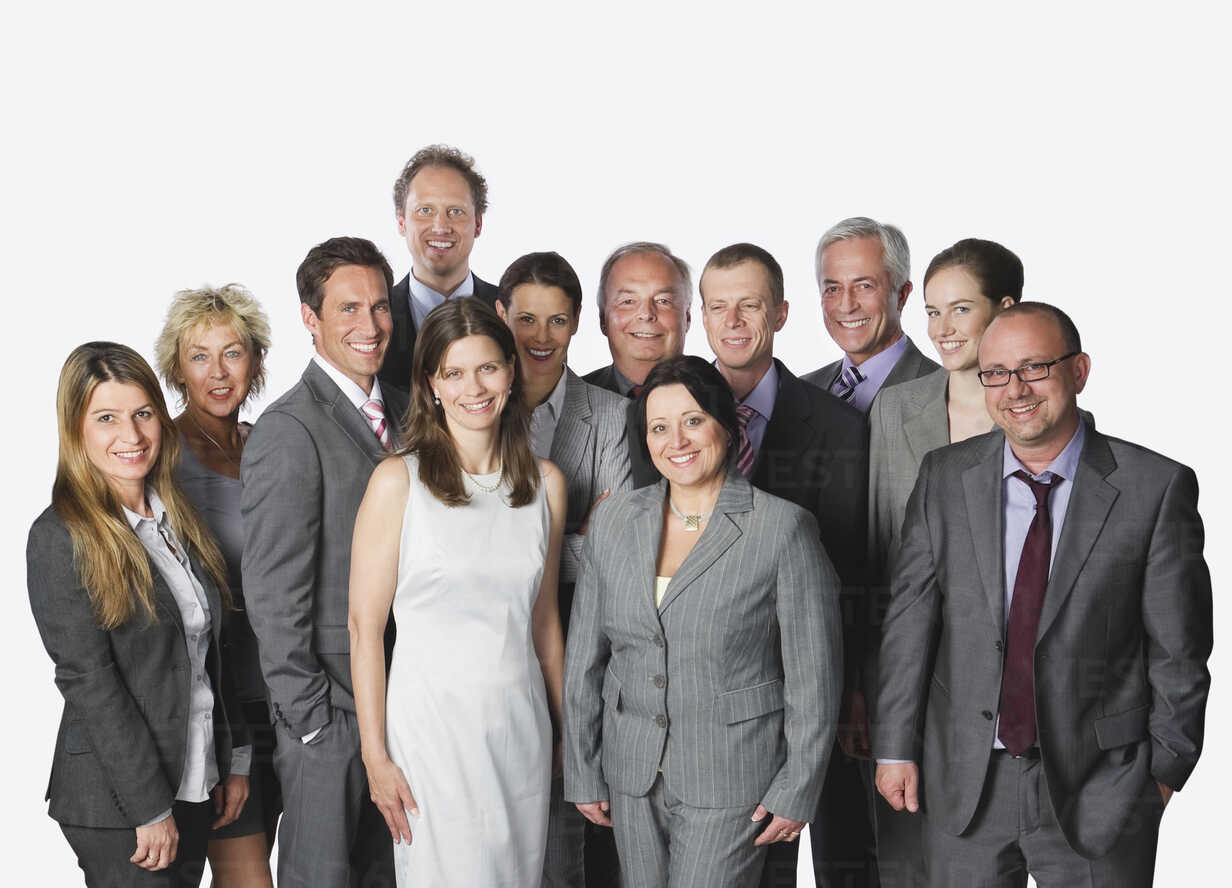

In [115]:
group=cv2.imread('/content/group.jpg')
cv2_imshow(group)

# Eyes

In [116]:
group=cv2.imread('/content/group.jpg')
model_eyes=cv2.CascadeClassifier('/content/haarcascade_eye.xml')
eyes=model_eyes.detectMultiScale(group , 1.2, 2)
eyes

array([[412, 199,  25,  25],
       [442, 199,  26,  26],
       [629, 243,  23,  23],
       [821, 279,  22,  22],
       [336, 296,  24,  24],
       [950, 297,  24,  24],
       [516, 308,  23,  23],
       [546, 311,  22,  22],
       [853, 275,  24,  24],
       [190, 348,  21,  21],
       [473, 358,  25,  25],
       [445, 364,  22,  22],
       [129, 403,  25,  25],
       [ 93, 405,  28,  28],
       [681, 410,  23,  23],
       [649, 417,  22,  22]], dtype=int32)

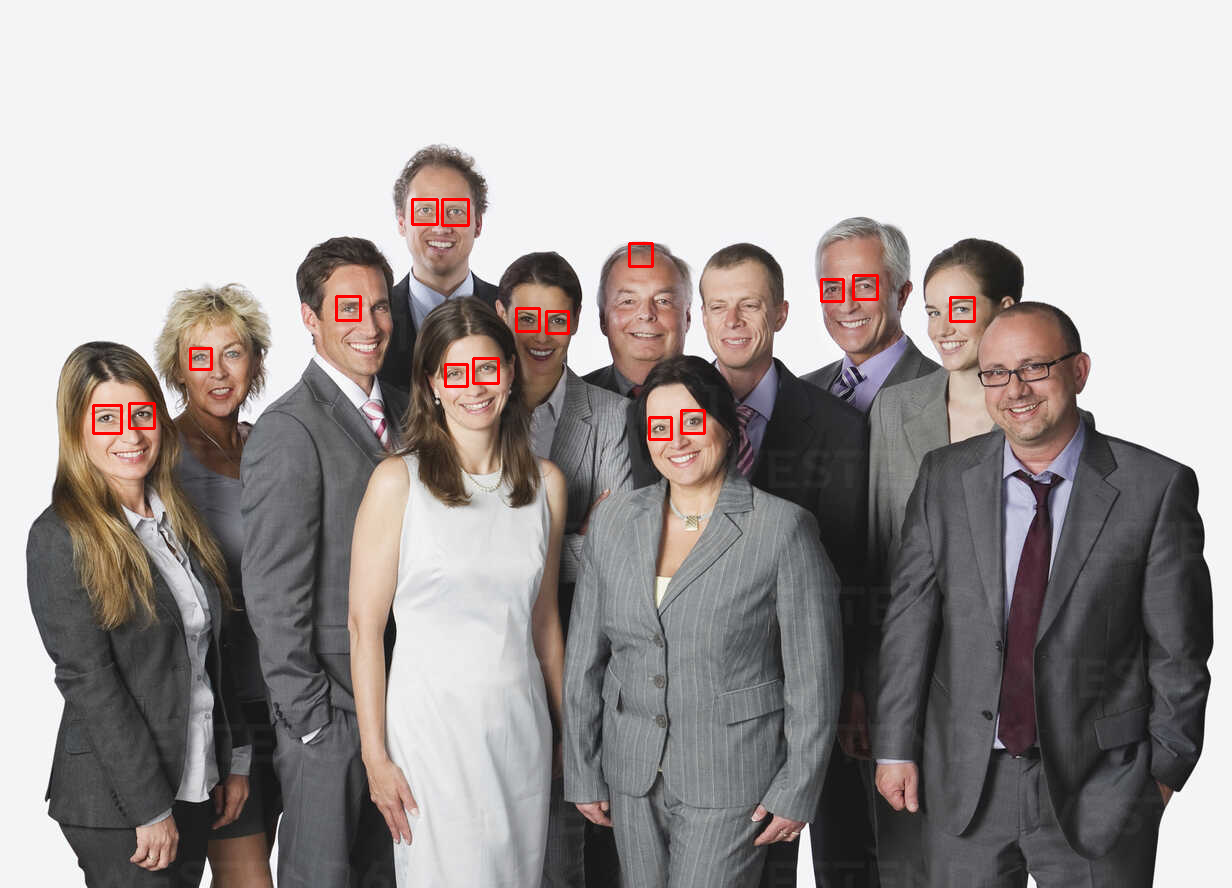

In [117]:
for (x,y,w,h) in eyes:
  cv2.rectangle(group,(x,y),(x+w,y+h),(0,0,255),2)
cv2_imshow(group)

# Faces

In [118]:
group=cv2.imread('/content/group.jpg')
model_frontal_face=cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
faces=model_frontal_face.detectMultiScale(group , 1.12, 8)
faces

array([[398, 178,  86,  86],
       [808, 255,  83,  83],
       [316, 274,  87,  87],
       [594, 266, 100, 100],
       [908, 280,  78,  78],
       [504, 292,  76,  76],
       [692, 275,  83,  83],
       [176, 324,  82,  82],
       [430, 339,  84,  84],
       [ 77, 383,  92,  92],
       [633, 392,  88,  88],
       [958, 323, 122, 122]], dtype=int32)

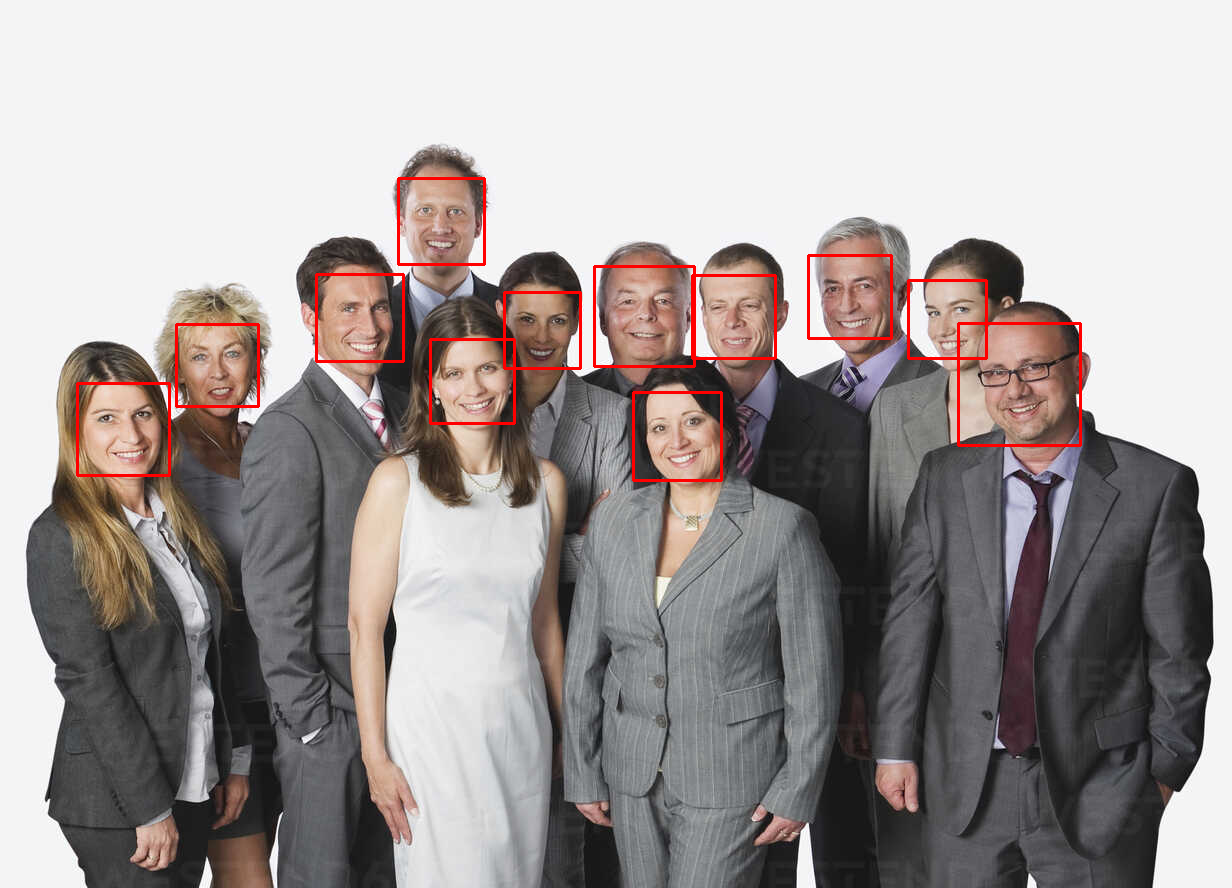

In [119]:
for (x,y,w,h) in faces:
  cv2.rectangle(group,(x,y),(x+w,y+h),(0,0,255),2)
cv2_imshow(group)

# Smile

In [120]:
group=cv2.imread('/content/group.jpg')
model_smile=cv2.CascadeClassifier('/content/haarcascade_smile.xml')
smile=model_smile.detectMultiScale(group , 1.3, 11)
smile

array([[423, 235,  36,  18],
       [416, 230,  50,  24],
       [835, 315,  36,  18],
       [718, 334,  36,  18],
       [523, 344,  36,  18],
       [829, 310,  50,  24],
       [203, 385,  36,  18],
       [620, 322,  52,  26],
       [712, 327,  51,  25],
       [337, 331,  53,  26],
       [450, 392,  51,  25],
       [997, 397,  53,  26],
       [657, 447,  52,  25],
       [ 92, 434,  73,  36],
       [637, 686, 174,  87]], dtype=int32)

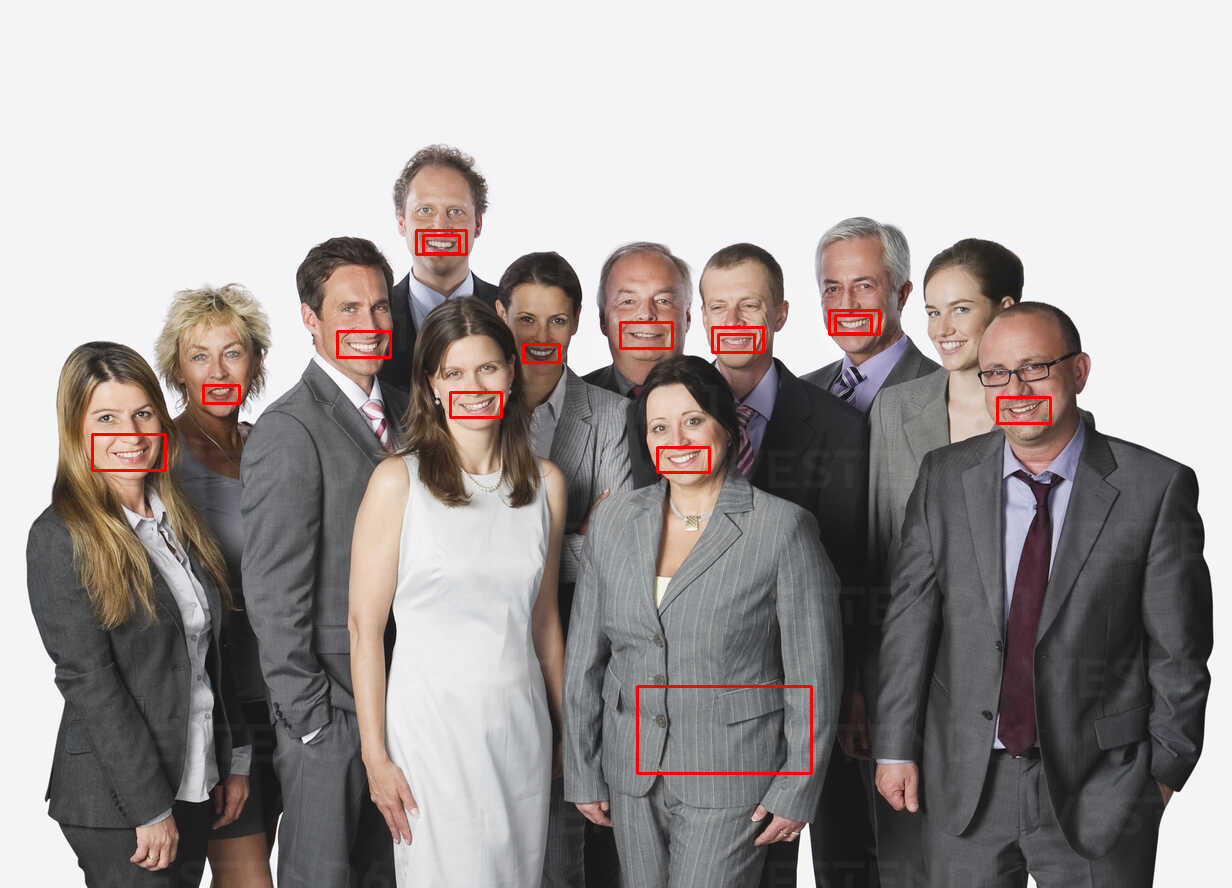

In [121]:
for (x,y,w,h) in smile:
  cv2.rectangle(group,(x,y),(x+w,y+h),(0,0,255),2)
cv2_imshow(group)

In [122]:
group=cv2.imread('/content/group.jpg')
model_glasses=cv2.CascadeClassifier('/content/haarcascade_eye_tree_eyeglasses.xml')
glasses=model_glasses.detectMultiScale(group , 1.5, 3)
glasses

array([[ 97, 408,  20,  20]], dtype=int32)

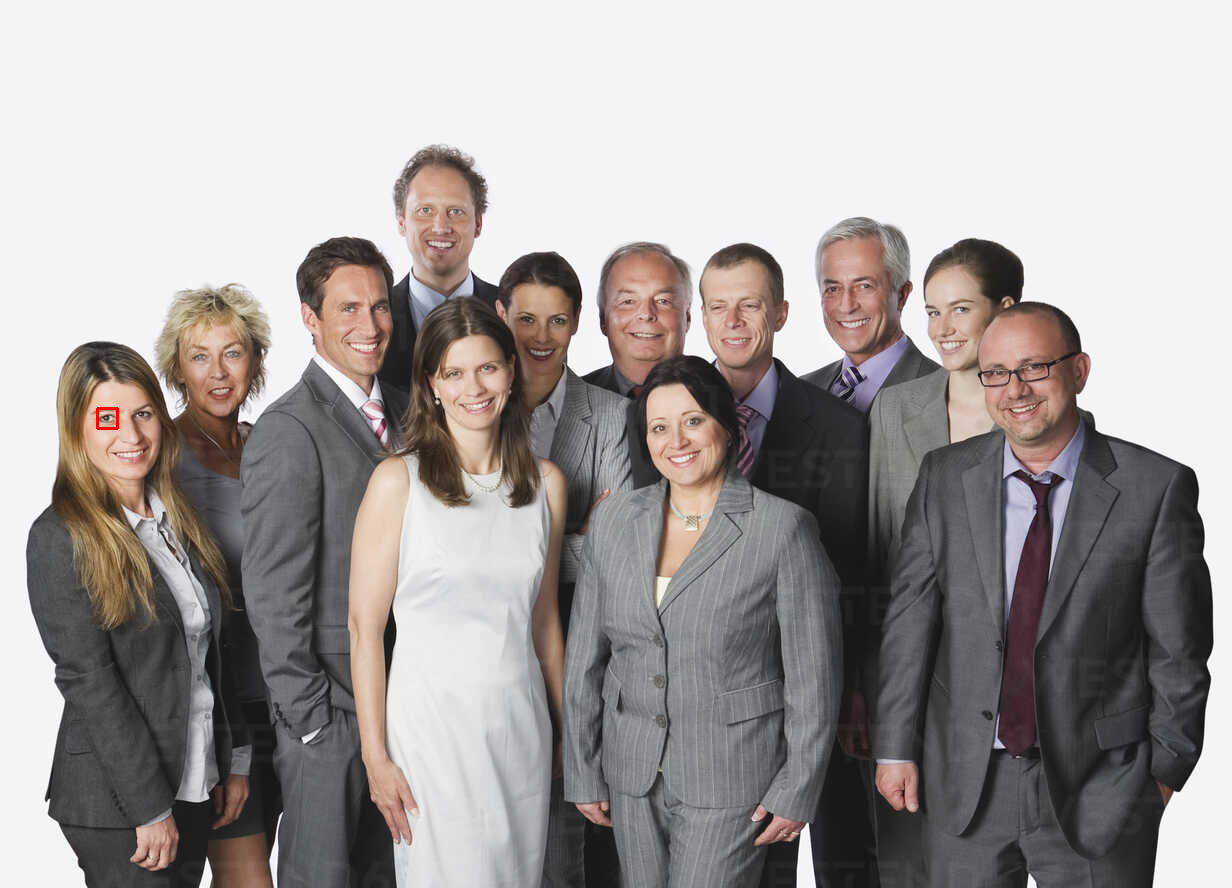

In [123]:
for (x,y,w,h) in glasses:
  cv2.rectangle(group,(x,y),(x+w,y+h),(0,0,255),2)
cv2_imshow(group)

# Number Plate

In [124]:
!wget https://cdn4.vectorstock.com/i/1000x1000/17/53/russian-license-number-plate-flat-style-design-vector-29461753.jpg -O plate.jpg

--2023-08-01 17:00:57--  https://cdn4.vectorstock.com/i/1000x1000/17/53/russian-license-number-plate-flat-style-design-vector-29461753.jpg
Resolving cdn4.vectorstock.com (cdn4.vectorstock.com)... 192.229.163.147
Connecting to cdn4.vectorstock.com (cdn4.vectorstock.com)|192.229.163.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174168 (170K) [image/jpeg]
Saving to: ‘plate.jpg’

plate.jpg           100%[===================>] 170.09K  --.-KB/s    in 0.03s   

2023-08-01 17:00:57 (5.20 MB/s) - ‘plate.jpg’ saved [174168/174168]



In [125]:
plates=cv2.imread('/content/plate.jpg')
model_plate=cv2.CascadeClassifier('/content/haarcascade_license_plate_rus_16stages.xml')
plate=model_plate.detectMultiScale(group , 1.5, 3)
plate

()

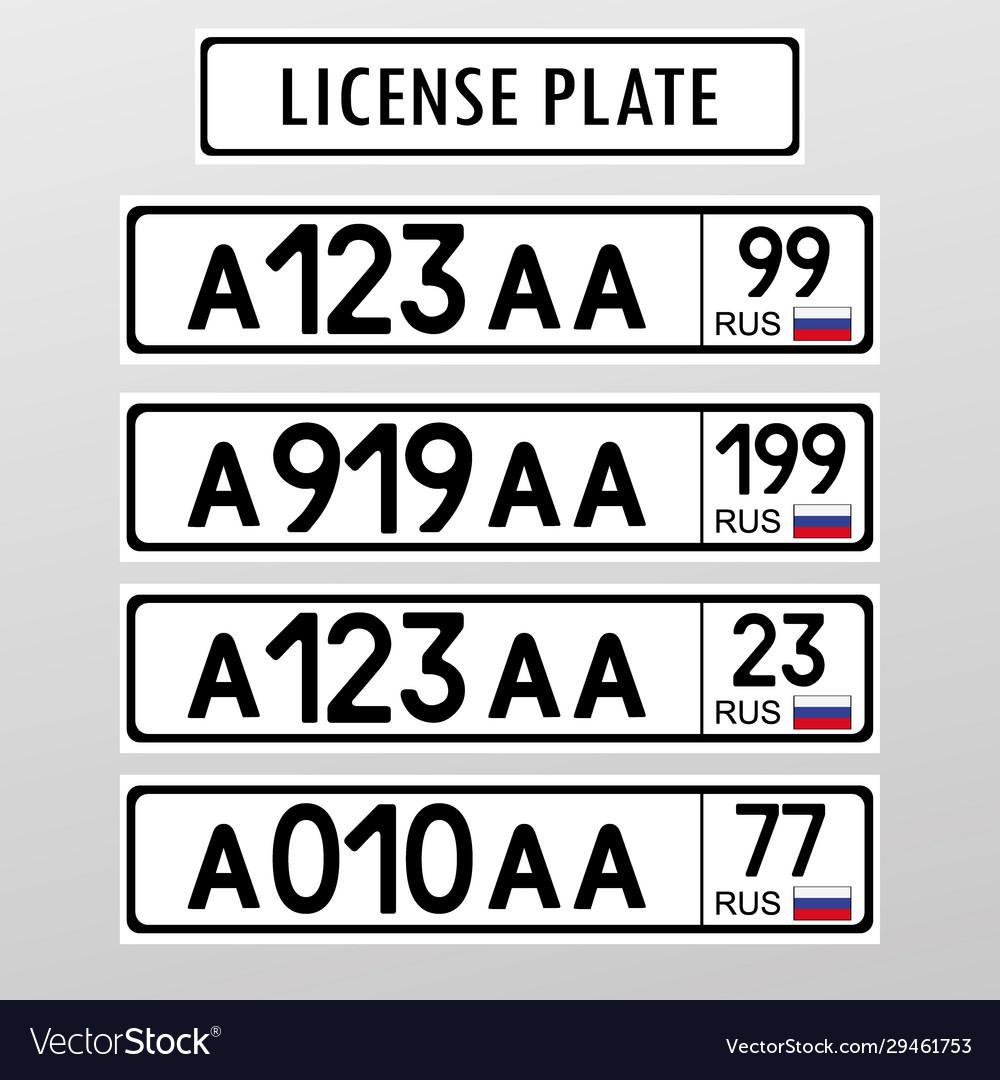

In [126]:
for (x,y,w,h) in plate:
  cv2.rectangle(plates,(x,y),(x+w,y+h),(0,0,255),2)
cv2_imshow(plates)